# Accessing Art Museums

In [394]:
#import libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
The following data sets are used in this project:
1. US Art Museums (CSV) - Art museums in the United States with website, city, state, ZIP Code, and cost of admission
2. 2022 Census Income Data (CSV) - Income data by ZIP Code

In [395]:
# read US Art Museums CSV
museums = pd.read_csv('data/US_Art_Museums.csv')

# display first 5 rows
museums.head()

,Unnamed: 0,Museum,Website,City,State,Zip Code,General Admission,Senior,Student,Children
0,1,Birmingham Museum of Art,artsbma.org,Birmingham,Alabama,35203,$0.00,$0.00,$0.00,$0.00
1,2,Huntsville Museum of Art,hsvmuseum.org,Huntsville,Alabama,35801,$10.00,$8.00,$5.00,$0.00
2,3,Mobile Museum of Art,mobilemuseumofart.com,Mobile,Alabama,36608,$12.00,$10.00,$8.00,$0.00
3,4,Montgomery Museum of Fine Arts,mmfa.org,Montgomery,Alabama,36117,$0.00,$0.00,$0.00,$0.00
4,5,Anchorage Museum of Art and History,anchoragemuseum.org,Anchorage,Alaska,99501,$18.00,$15.00,$9.00,$0.00


In [396]:
# read 2022 Census Income Data CSV
income = pd.read_csv('data/2022_Census_Income_Data.csv')

# display first 5 rows
income.head()

# LEADING ZERO PROBLEM

,Geography,Geographic area name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Asian,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Asian,...,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Not living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Not living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone
0,860Z200US00601,601,4564,334,64,42,4,8,20,32,...,9895,1455,21154,5589,11208,2272,9403,3371,23352,4538
1,860Z200US00602,602,6042,431,135,81,15,22,0,31,...,8669,1008,23676,17821,16086,1422,15352,1651,28872,17030
2,860Z200US00603,603,14117,695,865,183,20,23,19,29,...,9229,954,16333,1539,13147,1542,12382,1635,28824,12175
3,860Z200US00606,606,1185,163,0,21,0,21,0,21,...,11938,7641,-,**,17899,4102,17269,6376,18850,8182
4,860Z200US00610,610,3548,443,189,95,0,28,0,28,...,11913,1706,21406,5972,15247,2151,13688,3051,25658,7664


# Clean data

### Census Data CSV
The Census Data CSV includes a wide range of income measurements for specific race, gender, and household type, as well as margins of error for each measurement. For the purpose of this project, we are looking for the median income of all types calculated as one amount, so the data will need to be narrowed down and most columns will be removed.


In [397]:
# identify all columns
print(income.columns)

Index(['Geography', 'Geographic area name',
       'Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
       'Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
       'Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
       'Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
       'Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native',
       'Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native',
       'Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC O

In [398]:
# fiter down to necessary columns
income = income[['Geographic area name', 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households']]

# display remaining columns of data frame
income.head()

,Geographic area name,Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households
0,601,17526.0
1,602,20260.0
2,603,17703.0
3,606,19603.0
4,610,22796.0


In [399]:
# rename columns
income.rename(columns={'Geographic area name': 'Zip Code', 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households': 'Median Income'}, inplace=True)

# display new columns
income.head()

,Zip Code,Median Income
0,601,17526.0
1,602,20260.0
2,603,17703.0
3,606,19603.0
4,610,22796.0


The Census Data CSV includes more zip codes than are needed for comparing with the Art Museums CSV. Before merging, we will remove uneeded zip codes from the data frame.

In [400]:
# remove zip codes from Census Data that are not found in Art Museums
income = income[income['Zip Code'].isin(museums['Zip Code'])]

#check new number of zip codes in Census Data
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 53 to 33508
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Zip Code       300 non-null    int64  
 1   Median Income  273 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB


### Art Museums CSV
The Art Museums CSV includes data for specific groups of visitors. For the purpose of this project, we are looking at General Admission prices so the data for other groups can be removed.

In [401]:
# fiter down to necessary columns
museums = museums[['Unnamed: 0', 'Museum', 'Website', 'City', 'State', 'Zip Code', 'General Admission']]

# display remaining columns of data frame
museums.head()

,Unnamed: 0,Museum,Website,City,State,Zip Code,General Admission
0,1,Birmingham Museum of Art,artsbma.org,Birmingham,Alabama,35203,$0.00
1,2,Huntsville Museum of Art,hsvmuseum.org,Huntsville,Alabama,35801,$10.00
2,3,Mobile Museum of Art,mobilemuseumofart.com,Mobile,Alabama,36608,$12.00
3,4,Montgomery Museum of Fine Arts,mmfa.org,Montgomery,Alabama,36117,$0.00
4,5,Anchorage Museum of Art and History,anchoragemuseum.org,Anchorage,Alaska,99501,$18.00


# Merge data

In [402]:
df = museums.merge(income, on='Zip Code')
df

,Unnamed: 0,Museum,Website,City,State,Zip Code,General Admission,Median Income
0,1,Birmingham Museum of Art,artsbma.org,Birmingham,Alabama,35203,$0.00,42596.0
1,2,Huntsville Museum of Art,hsvmuseum.org,Huntsville,Alabama,35801,$10.00,97643.0
2,3,Mobile Museum of Art,mobilemuseumofart.com,Mobile,Alabama,36608,$12.00,59400.0
3,4,Montgomery Museum of Fine Arts,mmfa.org,Montgomery,Alabama,36117,$0.00,73919.0
4,5,Anchorage Museum of Art and History,anchoragemuseum.org,Anchorage,Alaska,99501,$18.00,73540.0
...,...,...,...,...,...,...,...,...
351,361,Milwaukee Art Museum,mam.org,Milwaukee,Wisconsin,53202,$19.00,62505.0
352,362,Villa Terrace Decorative Arts Museum,villaterrace.org,Milwaukee,Wisconsin,53211,$10.00,73783.0
353,363,Museum of Wisconsin Art,wisconsinart.org,West Bend,Wisconsin,53095,$15.00,77397.0
354,364,National Museum of Wildlife Art,wildlifeart.org,Jackson Hole,Wyoming,83001,$20.00,110734.0


In [403]:
# rename Unnamed: 0 to ID
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True )

# rename Zip Code to ZIP code
df.rename(columns={'Zip Code':'ZIP Code'}, inplace=True )
df.head()

,ID,Museum,Website,City,State,ZIP Code,General Admission,Median Income
0,1,Birmingham Museum of Art,artsbma.org,Birmingham,Alabama,35203,$0.00,42596.0
1,2,Huntsville Museum of Art,hsvmuseum.org,Huntsville,Alabama,35801,$10.00,97643.0
2,3,Mobile Museum of Art,mobilemuseumofart.com,Mobile,Alabama,36608,$12.00,59400.0
3,4,Montgomery Museum of Fine Arts,mmfa.org,Montgomery,Alabama,36117,$0.00,73919.0
4,5,Anchorage Museum of Art and History,anchoragemuseum.org,Anchorage,Alaska,99501,$18.00,73540.0


Clean merged data

In [404]:
# print data types to see which strings need to be converted to integers
print(df)
print(df.dtypes)

      ID                                Museum                Website  \
0      1              Birmingham Museum of Art            artsbma.org   
1      2              Huntsville Museum of Art          hsvmuseum.org   
2      3                  Mobile Museum of Art  mobilemuseumofart.com   
3      4        Montgomery Museum of Fine Arts               mmfa.org   
4      5   Anchorage Museum of Art and History    anchoragemuseum.org   
..   ...                                   ...                    ...   
351  361                  Milwaukee Art Museum                mam.org   
352  362  Villa Terrace Decorative Arts Museum       villaterrace.org   
353  363               Museum of Wisconsin Art       wisconsinart.org   
354  364       National Museum of Wildlife Art        wildlifeart.org   
355  365                    The Brinton Museum   thebrintonmuseum.org   

                City      State  ZIP Code General Admission  Median Income  
0         Birmingham    Alabama     35203     

In [405]:
# remove all NaN from Median Income
df.dropna(subset=["Median Income"], inplace=True)

# convert Median Income column from string to integer
df['Median Income'] = df['Median Income'].astype(float)
print(df)
print(df.dtypes)


      ID                                       Museum                 Website  \
0      1                     Birmingham Museum of Art             artsbma.org   
1      2                     Huntsville Museum of Art           hsvmuseum.org   
2      3                         Mobile Museum of Art   mobilemuseumofart.com   
3      4               Montgomery Museum of Fine Arts                mmfa.org   
4      5          Anchorage Museum of Art and History     anchoragemuseum.org   
..   ...                                          ...                     ...   
350  360  Patrick and Beatrice Haggerty Museum of Art  marquette.edu/haggerty   
351  361                         Milwaukee Art Museum                 mam.org   
352  362         Villa Terrace Decorative Arts Museum        villaterrace.org   
353  363                      Museum of Wisconsin Art        wisconsinart.org   
354  364              National Museum of Wildlife Art         wildlifeart.org   

             City      Stat

In [406]:
df["General Admission"] = df["General Admission"].replace("[$,]", "", regex=True).astype(float)
print(df)
print(df.dtypes)

      ID                                       Museum                 Website  \
0      1                     Birmingham Museum of Art             artsbma.org   
1      2                     Huntsville Museum of Art           hsvmuseum.org   
2      3                         Mobile Museum of Art   mobilemuseumofart.com   
3      4               Montgomery Museum of Fine Arts                mmfa.org   
4      5          Anchorage Museum of Art and History     anchoragemuseum.org   
..   ...                                          ...                     ...   
350  360  Patrick and Beatrice Haggerty Museum of Art  marquette.edu/haggerty   
351  361                         Milwaukee Art Museum                 mam.org   
352  362         Villa Terrace Decorative Arts Museum        villaterrace.org   
353  363                      Museum of Wisconsin Art        wisconsinart.org   
354  364              National Museum of Wildlife Art         wildlifeart.org   

             City      Stat

# Calculations

Calculations using Median Income for each ZIP Code and cost of General Admission will be used to create an index of art museum economic accessibility to the local community. This index is calculated by finding Median Monthly Income, determining what percentage of that income would be required for General Admission, and then multiplying that by 10,000 to determine ranking on scale of 0 to 100; 0 being the most economically accessible museum and 100 being the least economically accessible museum.

In [407]:
# create new column dividing median income by 12 to find median monthly income
df['Monthly Median Income'] = df['Median Income'] / 12

# round Monthly Median Income to one decimal place
df['Monthly Median Income'] = df['Monthly Median Income'].round(1)
df

# display index


,ID,Museum,Website,City,State,ZIP Code,General Admission,Median Income,Monthly Median Income
0,1,Birmingham Museum of Art,artsbma.org,Birmingham,Alabama,35203,0.0,42596.0,3549.7
1,2,Huntsville Museum of Art,hsvmuseum.org,Huntsville,Alabama,35801,10.0,97643.0,8136.9
2,3,Mobile Museum of Art,mobilemuseumofart.com,Mobile,Alabama,36608,12.0,59400.0,4950.0
3,4,Montgomery Museum of Fine Arts,mmfa.org,Montgomery,Alabama,36117,0.0,73919.0,6159.9
4,5,Anchorage Museum of Art and History,anchoragemuseum.org,Anchorage,Alaska,99501,18.0,73540.0,6128.3
...,...,...,...,...,...,...,...,...,...
350,360,Patrick and Beatrice Haggerty Museum of Art,marquette.edu/haggerty,Milwaukee,Wisconsin,53211,0.0,73783.0,6148.6
351,361,Milwaukee Art Museum,mam.org,Milwaukee,Wisconsin,53202,19.0,62505.0,5208.8
352,362,Villa Terrace Decorative Arts Museum,villaterrace.org,Milwaukee,Wisconsin,53211,10.0,73783.0,6148.6
353,363,Museum of Wisconsin Art,wisconsinart.org,West Bend,Wisconsin,53095,15.0,77397.0,6449.8


In [408]:
# create Index column ny dividing general admission by monthly median income
df[['Index']] = df[['General Admission']].div(df['Monthly Median Income'], axis=0)

# multiply index by 10,000 to find whole number
df['Index'] = df ['Index'] * 10000

# round Index to one decimal place
df['Index'] = df['Index'].round(1)
df

,ID,Museum,Website,City,State,ZIP Code,General Admission,Median Income,Monthly Median Income,Index
0,1,Birmingham Museum of Art,artsbma.org,Birmingham,Alabama,35203,0.0,42596.0,3549.7,0.0
1,2,Huntsville Museum of Art,hsvmuseum.org,Huntsville,Alabama,35801,10.0,97643.0,8136.9,12.3
2,3,Mobile Museum of Art,mobilemuseumofart.com,Mobile,Alabama,36608,12.0,59400.0,4950.0,24.2
3,4,Montgomery Museum of Fine Arts,mmfa.org,Montgomery,Alabama,36117,0.0,73919.0,6159.9,0.0
4,5,Anchorage Museum of Art and History,anchoragemuseum.org,Anchorage,Alaska,99501,18.0,73540.0,6128.3,29.4
...,...,...,...,...,...,...,...,...,...,...
350,360,Patrick and Beatrice Haggerty Museum of Art,marquette.edu/haggerty,Milwaukee,Wisconsin,53211,0.0,73783.0,6148.6,0.0
351,361,Milwaukee Art Museum,mam.org,Milwaukee,Wisconsin,53202,19.0,62505.0,5208.8,36.5
352,362,Villa Terrace Decorative Arts Museum,villaterrace.org,Milwaukee,Wisconsin,53211,10.0,73783.0,6148.6,16.3
353,363,Museum of Wisconsin Art,wisconsinart.org,West Bend,Wisconsin,53095,15.0,77397.0,6449.8,23.3


In [409]:
# sort by Index
df = df.sort_values(['Index'], ascending=False)
df.head(20)

,ID,Museum,Website,City,State,ZIP Code,General Admission,Median Income,Monthly Median Income,Index
234,241,Akron Art Museum,akronartmuseum.org,Akron,Ohio,44308,12.0,15875.0,1322.9,90.7
263,270,Carnegie Museum of Art,cmoa.org,Pittsburgh,Pennsylvania,15213,20.0,28790.0,2399.2,83.4
209,215,Museum of the City of New York,mcny.org,New York,New York,10029,23.0,35640.0,2970.0,77.4
79,85,Peoria Riverfront Museum,peoriariverfrontmuseum.org,Peoria,Illinois,61602,12.0,20000.0,1666.7,72.0
138,144,Michele & Donald DAmour Museum of Fine Arts,springfieldmuseums.org,Springfield,Massachusetts,1105,13.0,23948.0,1995.7,65.1
261,268,University of Pennsylvania Museum of Archaeolo...,penn.museum,Philadelphia,Pennsylvania,19104,18.0,33766.0,2813.8,64.0
87,93,Figge Art Museum,figgeartmuseum.org,Davenport,Iowa,52801,12.0,24255.0,2021.2,59.4
114,120,Boston Museum of Fine Arts,mfa.org,Boston,Massachusetts,2115,25.0,51454.0,4287.8,58.3
276,283,Columbia Museum of Art,columbiamuseum.org,Columbia,South Carolina,29201,15.0,33561.0,2796.8,53.6
95,101,Speed Art Museum,speedmuseum.org,Louisville,Kentucky,40208,15.0,34206.0,2850.5,52.6


In [410]:
# create new CSV with clean, complete dataframe
df.to_csv('Art_Museum_Index_df.csv')

# Visualizations

Visualization ideas:
1. Top 10 Highest Index Museums (least economically accessible)
2. Spectrum of Museums
3. Chart for each state (to compare the indexes for different ZIP codes)

### Highest Index Cities (Least Economically Accessible Cities)

In [411]:
# Calculate average index for each city
average_index_per_city = df.groupby('City')['Index'].mean().reset_index()

print(average_index_per_city)

              City  Index
0          Abilene  13.60
1            Akron  90.70
2           Albany  25.90
3        Allentown  36.90
4         Amarillo  31.30
..             ...    ...
190     Wilmington  25.35
191  Winston-Salem  34.10
192    Winter Park   7.10
193      Worcester  37.10
194     Youngstown   0.00

[195 rows x 2 columns]


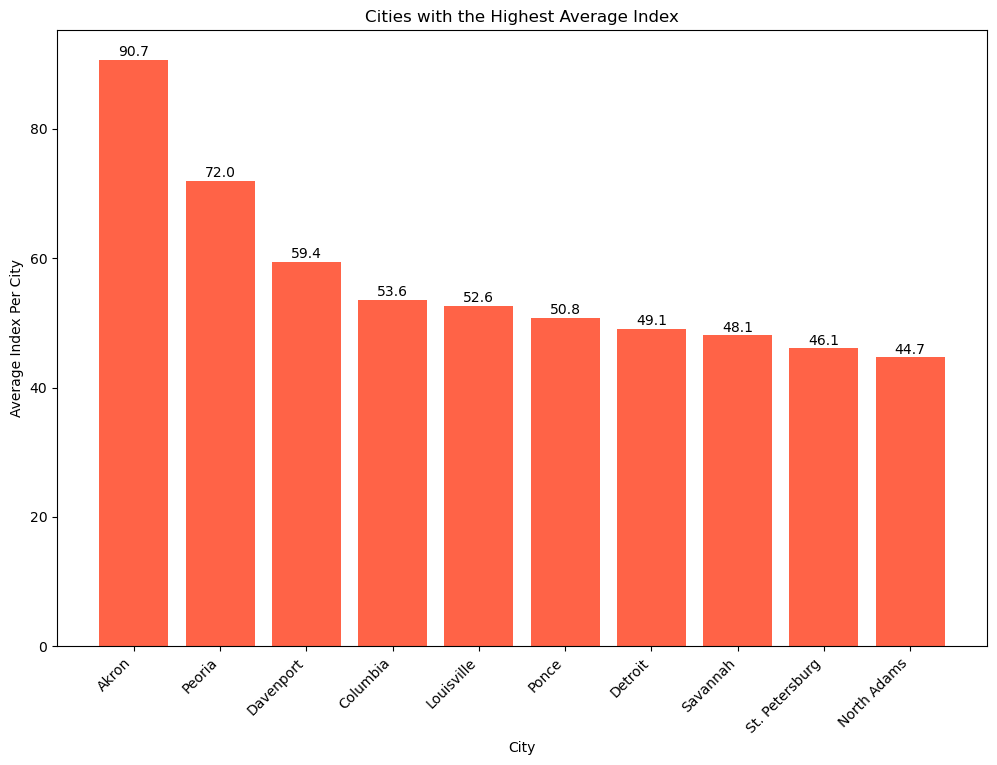

In [412]:
# sort by average index in descending order and select the highest
highest_average_index = average_index_per_city.nlargest(10, 'Index')

# create a vertical bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(highest_average_index['City'], highest_average_index['Index'], color='tomato')
plt.xlabel('City')
plt.ylabel('Average Index Per City')
plt.title('Cities with the Highest Average Index')

# create diagonal labels
plt.xticks(rotation=45, ha='right')

# display Index number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.1,
        round(yval, 2),
        ha='center',
        va='bottom'
    )

plt.show()

### Highest Index Museums (Least Economically Accessible)

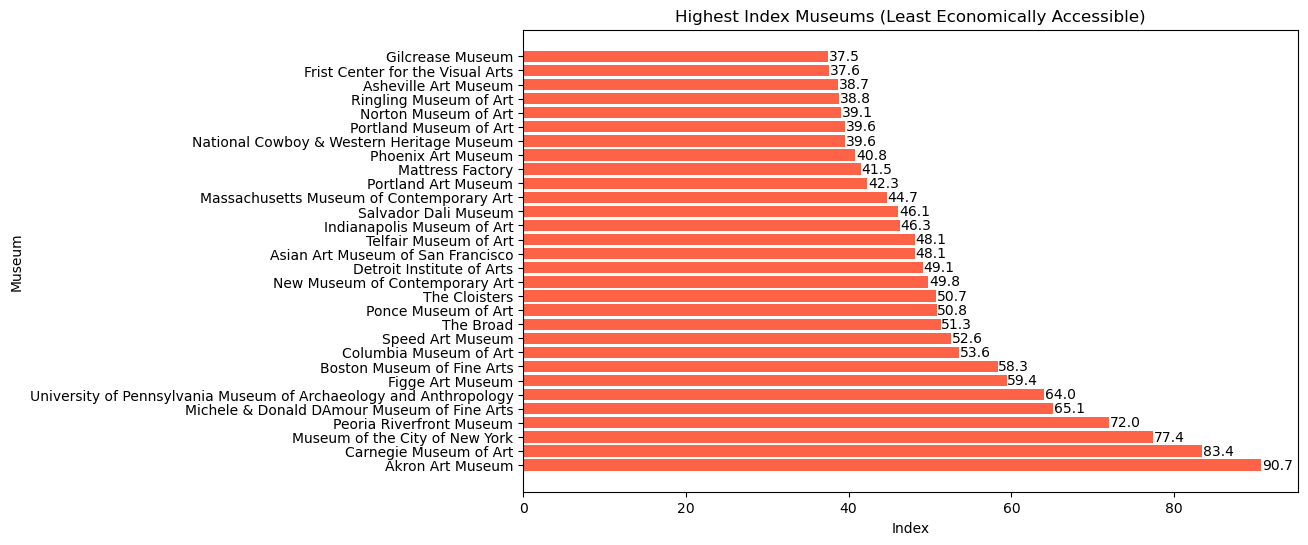

In [413]:
df = df.sort_values(['Index'], ascending=False).head(30)

# create the horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Museum'], df['Index'], color='tomato')
plt.ylabel('Museum')
plt.xlabel('Index')
plt.title('Highest Index Museums (Least Economically Accessible)')

# display Index number on the right side of each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(
        xval + 0.1,
        bar.get_y() + bar.get_height()/2,
        round(xval, 2),
        ha='left',
        va='center'
    )

plt.show()

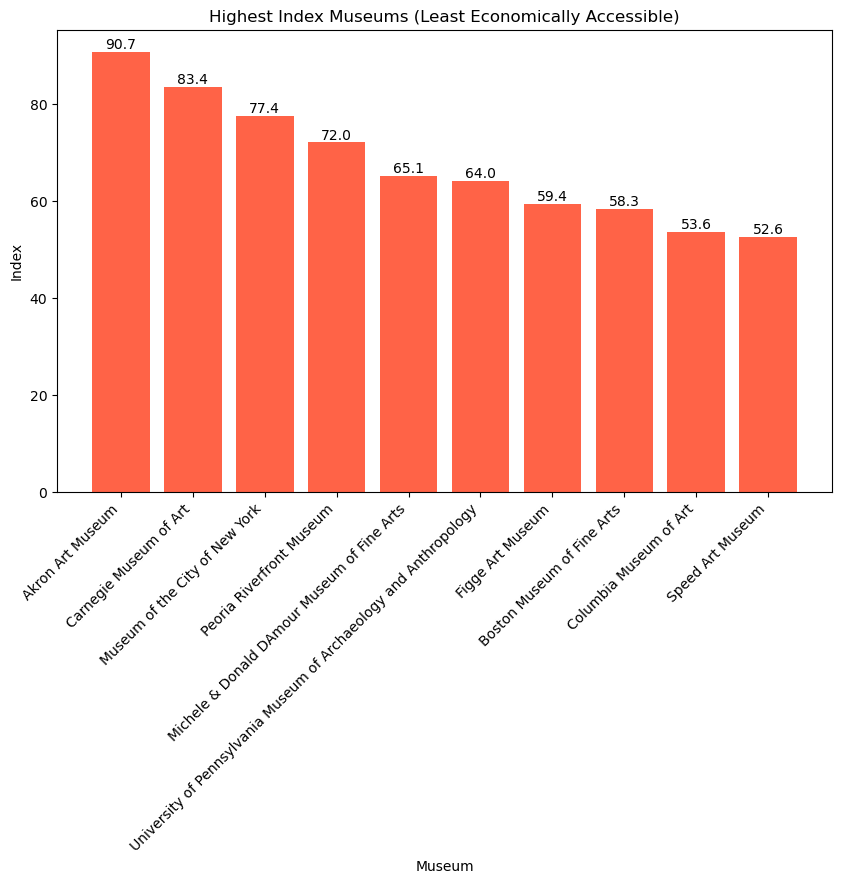

In [414]:
# sort index by descending and show top 10 results
df = df.sort_values(['Index'], ascending=False).head(10)

# create the vertical bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Museum'], df['Index'], color='tomato')
plt.xlabel('Museum')
plt.ylabel('Index')
plt.title('Highest Index Museums (Least Economically Accessible)')

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# display Index number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.1,
        round(yval, 2),
        ha='center',
        va='bottom'
    )

plt.show()